In [2]:
print("Homework 2")
print(" ")
print("1. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?")
print(" ")
print("The probability of rolling sevens is greater than that of rolling snake eyes since there are six conditions that fulfill rolling sevens in total 36 conditions, which is 1/6 probability, and there is only one chance to roll a snake eye in all 36 chances, which is a 1/36 probability.")

1. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?
 
The probability of rolling sevens is greater than that of rolling snake eyes since there are six conditions that fulfill rolling sevens in total 36 conditions, which is 1/6 probability, and there is only one chance to roll a snake eye in all 36 chances, which is a 1/36 probability.


In [3]:
print("2. Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).")
print(" ")
print("Based on the counting and calculations, I found that the sum of 2 six-sided dice can be from 2 to 12, and the probability is normally distributed. P(2)=P(12)=0.0.028, P(3)=P(11)=0.056, P(4)=P(10)=0.083, P(5)=P(9)=0.111, P(6)=P(8)=0.139, and P(7)=0.167")

2. Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).
 
Based on the counting and calculations, I found that the sum of 2 six-sided dice can be from 2 to 12, and the probability is normally distributed. P(2)=P(12)=0.0.028, P(3)=P(11)=0.056, P(4)=P(10)=0.083, P(5)=P(9)=0.111, P(6)=P(8)=0.139, and P(7)=0.167


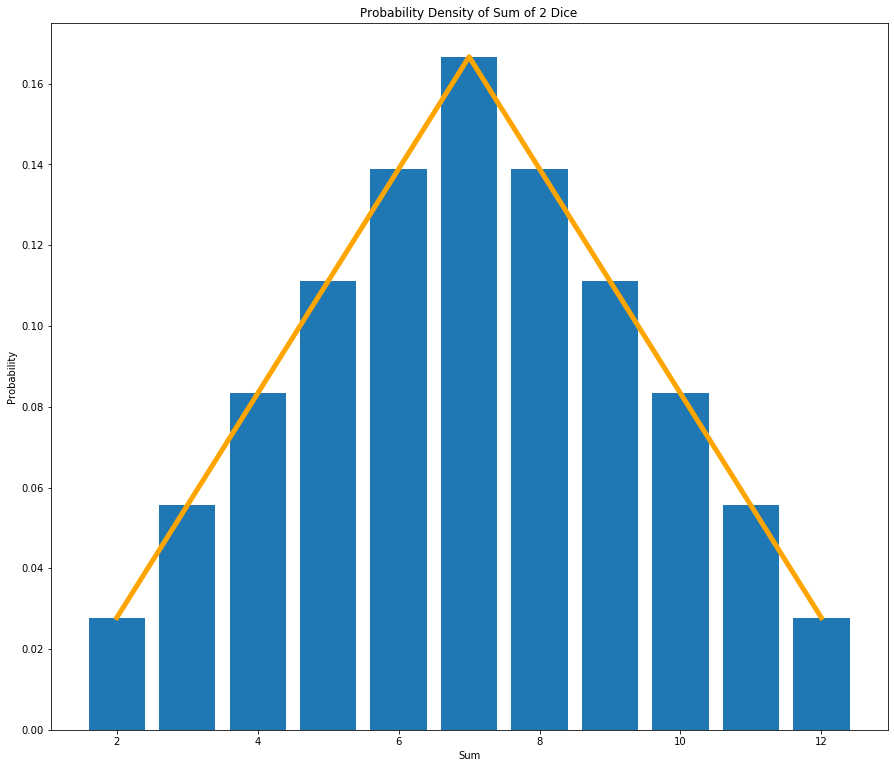

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal

plt.rcParams["figure.figsize"] = (15,13)
fig, ax = plt.subplots(1, 1)

prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
sums = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12])
conv = signal.convolve(prob,prob)
plt.title(f"Probability Density of Sum of 2 Dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
ax.bar(sums, conv)
ax.plot(sums, conv, color = 'orange', lineWidth = 5)

In [5]:
print("As the graph shown above, after doing convolution, we get a graph that presents the same result as we have caculated for the probability of the sum of two dice.")
print(" ")
print("3. Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.")
print(" ")
print("To calculate the mean of a probability distribution, we multiply the every variable in the sample by its probability density, and then, we add these products together, which is, for question 2, ")
print(np.sum(sums * conv))
print(" ")
print("To calculate the variance of the distribution, we are going to find the expectation value of the square deviation of every variable in the sample from its mean.")
square = np.square(sums - np.sum(sums * conv))
print(np.sum(square * conv))
print(" ")
print("Thus, the mean of the distribution is 6.99 and the variance is 5.83.")
print(" ")

As the graph shown above, after doing convolution, we get a graph that presents the same result as we have caculated for the probability of the sum of two dice.
 
3. Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.
 
To calculate the mean of a probability distribution, we multiply the every variable in the sample by its probability density, and then, we add these products together, which is, for question 2, 
6.999999999999998
 
To calculate the variance of the distribution, we are going to find the expectation value of the square deviation of every variable in the sample from its mean.
5.833333333333333
 
Thus, the mean of the distribution is 6.99 and the variance is 5.83.
 


4. Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.
 


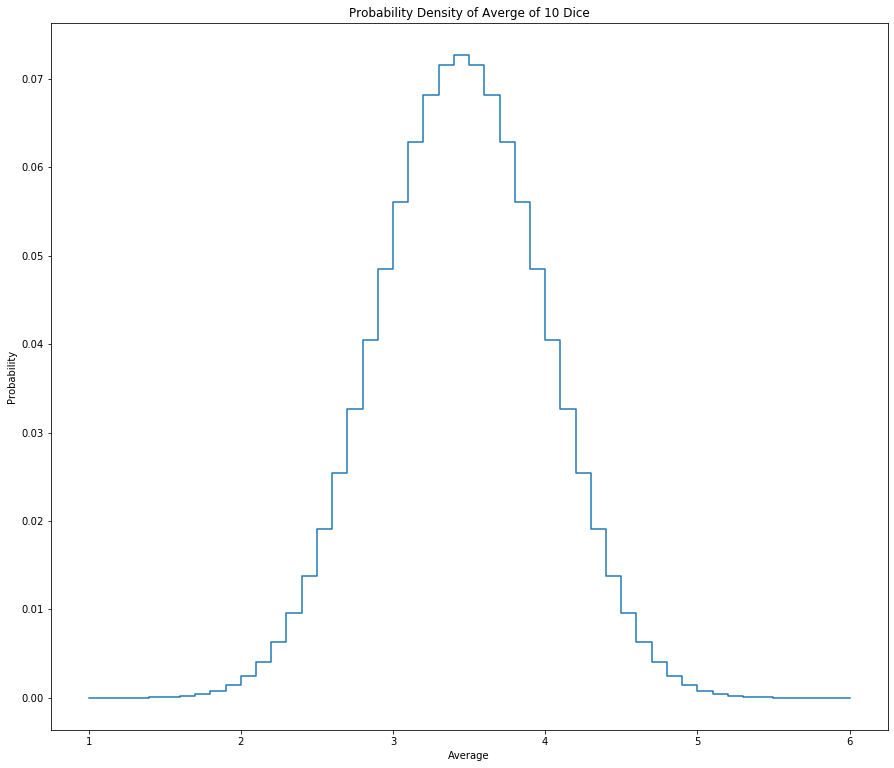

In [6]:
print("4. Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.")
print(" ")
fig, ax = plt.subplots(1, 1)


prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
conv = signal.convolve(prob, prob)

for _ in range(8):
    conv = signal.convolve(conv, prob)
    aver = np.arange(len(conv))
plt.title(f"Probability Density of Averge of 10 Dice")
plt.xlabel("Average")
plt.ylabel("Probability")
ax.step(aver / 10 + 1, conv)

In [7]:
print("As shown above, the probability distribution is similar to a Gaussian Distribution. This is because the function of average is equal to the function of sum divide a constant number. Thus, the probability distribution will not change. Also, as we do convolution, the probability distribution will not change because both functions are normally distributed, and therefore, third function generated will also be normally distributed.")
print(" ")

As shown above, the probability distribution is similar to a Gaussian Distribution. This is because the function of average is equal to the function of sum divide a constant number. Thus, the probability distribution will not change. Also, as we do convolution, the probability distribution will not change because both functions are normally distributed, and therefore, third function generated will also be normally distributed.
 


5. Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.
 


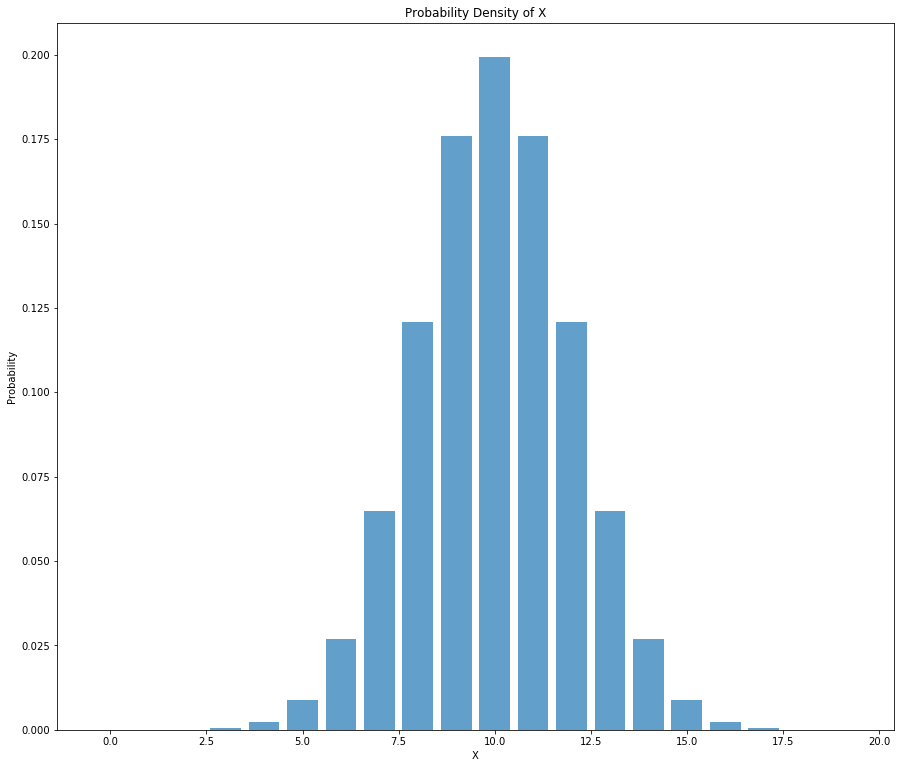

In [23]:
print("5. Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.")
print(" ")

fig, ax = plt.subplots(1, 1)
x = np.arange(20)
ax.bar(x,stats.norm.pdf(x,loc = 10, scale = 2),linewidth = 8,alpha = 0.7)
plt.title(f"Probability Density of X")
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

The graph above is the probability of X, and it is a Gaussian disrtibution with a standard deviation of 2. Now, let's do the sum of it.
 


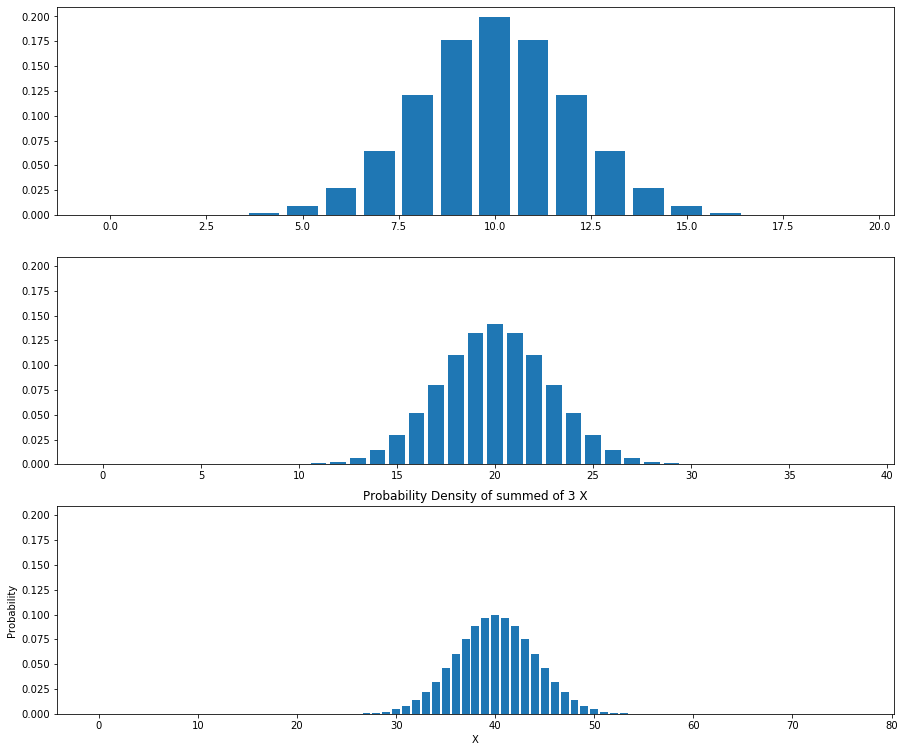

In [27]:
print("The graph above is the probability of X, and it is a Gaussian disrtibution with a standard deviation of 2. Now, let's do the sum of it.")
print(" ")

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey = True)
#plt.xlim(0,20)
x = np.arange(20)
pdf = stats.norm.pdf(x,loc = 10., scale = 2)
plt.title(f"Probability Density of X")
plt.xlabel("X")
plt.ylabel("Probability")
ax1.bar(x,pdf)
pdf2 = signal.convolve(pdf, pdf)
x = np.arange(len(pdf2))
plt.title(f"Probability Density of X")
plt.xlabel("X")
plt.ylabel("Probability")
ax2.bar(x,pdf2)
pdf3 = signal.convolve(pdf2, pdf2)
x = np.arange(len(pdf3))
plt.title(f"Probability Density of summed of 3 X")
plt.xlabel("X")
plt.ylabel("Probability")
ax3.bar(x, pdf3)
plt.show()

From the above graphs, it is clear that, for a initially normally distribution, the sum of the distribution will still be Gaussian Distribution.
Now, let's see the average.


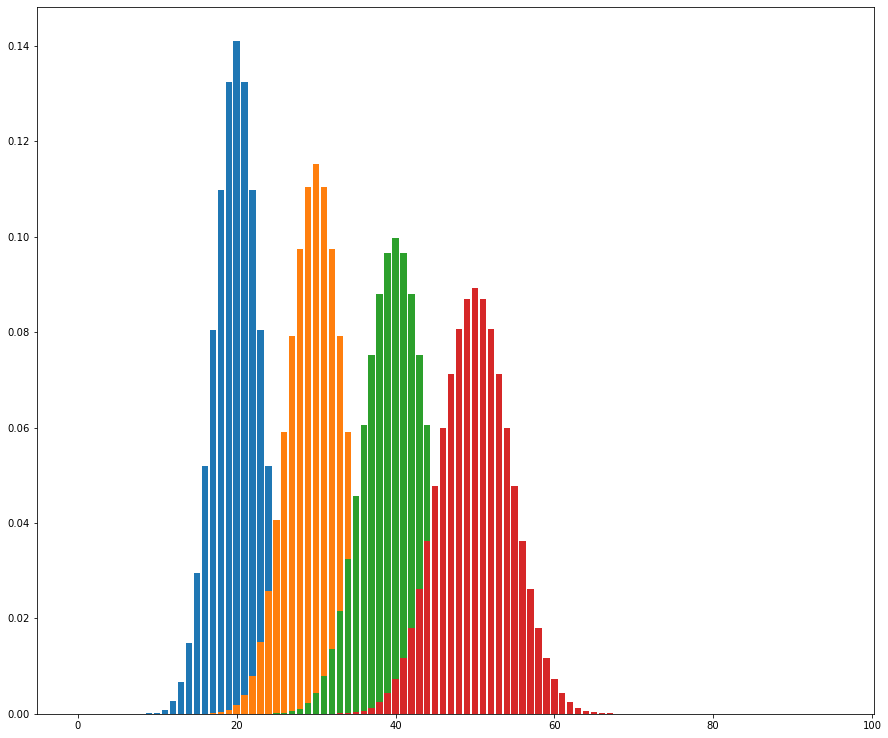

In [28]:
print("From the above graphs, it is clear that, for a initially normally distribution, the sum of the distribution will still be Gaussian Distribution.")
print("Now, let's see the average.")

fig, ax = plt.subplots(1,1)
x = np.arange(20)
pdf = stats.norm.pdf(x, loc = 10., scale = 2)
aver = pdf
for x in range (4):
    aver = signal.convolve(aver, pdf)
    x = np.arange(len(aver))
    ax.bar(x, aver)
plt.show()

In [29]:
print("From the graph above, the distribution is averaged by 4 times. It shows that the average of an initially Gaussian Distribution is also a Gaussian Distribution.")
print("Furthermore, as we do the convolution for sum and average, we can see that the peak value of the distribution is getting smaller, and the density is becoming more spread out. This is an important factor to be considered since, as we integrate the data, the standard deviation changes over time.  Thus, in order to find an accurate 'sigma' value and more normally distributed data sample, we should integrate more data.")

From the graph above, the distribution is averaged by 4 times. It shows that the average of an initially Gaussian Distribution is also a Gaussian Distribution.
Furthermore, as we do the convolution for sum and average, we can see that the peak value of the distribution is getting smaller, and the density is becoming more spread out. This is an important factor to be considered since, as we integrate the data, the standard deviation changes over time.  Thus, in order to find an accurate 'sigma' value and more normally distributed data sample, we should integrate more data.
